# CS145 Introduction to Data Mining - Assignment 2
## Deadline: 11:59PM (midnight), April 21, 2024

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs for key theorems. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your suboldsymbolission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Collaboration and Integrity

* Collaboration is encouraged, but all final suboldsymbolissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

## Before You Start

Useful information about managing environments can be found [here](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html).

You may also quickly review the usage of basic Python and Numpy package, if needed in coding for matrix operations.

In this notebook, you must not delete any code cells in this notebook. If you change any code outside the blocks that you are allowed to edit (between `STRART/END YOUR CODE HERE`), you need to highlight these changes. You may add some additional cells to help explain your results and observations.

## Part 1: Multilayer Perceptrons and Backpropagation

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import ndarray
from typing import Any

In this part, we provide some random test cases, which cover the gradient computation for the `Sigmoid` and `ReLU` activation functions, the `backward` pass of the `Activation` and `Linear` layers, and the loss and gradient computation for the `MSELoss` and `BinaryCrossEntropyLoss` functions. You can run these test cases to validate your implementation.

### Problem 1 (10 points)

Implement the `gradient` of Sigmoid and ReLU activation functions.
The `Activation` class is designed to accomodate various activation functions. Explain its functionality: why the `update` function is empty and why the `backward` function is implemented this way?

In [ ]:
class Sigmoid:
    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass of the Sigmoid activation function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: Sigmoid activation applied elementwise to the input array.
        """
        return 1 / (1 + np.exp(-x))

    def gradient(self, x: ndarray) -> ndarray:
        """
        Compute the gradient of the Sigmoid function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: The gradient of the Sigmoid function evaluated at each element of the input array.
        """
        # START YOUR CODE HERE
        # TODO: Fill in the code below to compute the gradient of the Sigmoid function.
        # END YOUR CODE HERE


class ReLU:
    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass of the ReLU activation function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: ReLU activation applied elementwise to the input array.
        """
        return np.maximum(0, x)

    def gradient(self, x: ndarray) -> ndarray:
        """
        Compute the gradient of the ReLU function.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: The gradient of the ReLU function, which is 1 for positive elements and 0 for non-positive elements.
        """
        # START YOUR CODE HERE
        # TODO: Fill in the code below to compute the gradient of the ReLU function.
        # END YOUR CODE HERE


class Activation:
    """
    Wrapper layer for activation functions.

    Attributes:
        activation (instance): The activation instance.
        name (str): The name of the activation.
        input (ndarray): The last input passed to the activation function.
        output (ndarray): The last output from the activation function.
    """
    def __init__(self, act, name="activation"):
        self.activation = act
        self.name = name
        self.input = None
        self.output = None

    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass of the activation function and store input/output for gradient computation.

        Parameters:
            x (ndarray): The input array.

        Returns:
            ndarray: The result of the activation function.
        """
        self.input = x
        self.output = self.activation.forward(x)
        return self.output

    def backward(self, gradient_loss_to_output: ndarray) -> ndarray:
        """
        Compute the backward pass of the activation function.

        Parameters:
            gradient_loss_to_output (ndarray): The gradient of the loss function with respect to the output of this layer.

        Returns:
            ndarray: The gradient of the loss function with respect to the input of this layer.
        """
        return self.activation.gradient(self.input) * gradient_loss_to_output

    def update(self, *args, **kwargs):
        """
        Placeholder for updating parameters, if applicable. For activations, this might be empty.
        """
        pass

    def __call__(self, x: ndarray) -> ndarray:
        """
        Make the class callable, equivalent to calling the forward method.
        """
        return self.forward(x)
    def __repr__(self) -> str:
        return f"Activation ({self.name})"

In [ ]:
print('Testing Sigmoid gradient...')
x = np.array([-2, -1, 0, 1, 2]).reshape(-1, 1)
s = Sigmoid()
expected_output = np.array([[0.10499359], [0.19661193], [0.25], [0.19661193], [0.10499359]])
assert np.allclose(s.gradient(x), expected_output), 'Sigmoid gradient test failed'
print('Sigmoid gradient test passed!')

In [ ]:
print('Testing ReLU gradient...')
x = np.array([-2, -1, 1, 2]).reshape(-1, 1)
r = ReLU()
expected_output = np.array([[0], [0], [1], [1]])
assert np.allclose(r.gradient(x), expected_output), 'ReLU gradient test failed'
print('ReLU gradient test passed!')

In [ ]:
print('Testing Activation backward...')
x = np.array([-2, -1, 1, 2]).reshape(-1, 1)
a = Activation(ReLU())
out = a(x)
output_error = np.array([0.1, 0.2, 0.4, 0.5]).reshape(-1, 1)
expected_output = np.array([[0.], [0.], [0.4], [0.5]])
assert np.allclose(a.backward(output_error), expected_output), 'Activation backward test failed'
print('Activation backward test passed!')

**[TODO: Write your answer here]**

### Problem 2 (10 points)

Given the following network, please derive the gradient of the loss with respect to the input $\frac{\mathrm{d}l}{\mathrm{d}\boldsymbol{X}} \in \mathbb{R}^{n\times d}$.
You may find [this](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf) matrix cookbook useful.

$$
\begin{align}
    \boldsymbol{Z} &= \boldsymbol{X} + \operatorname{sigmoid}(\boldsymbol{XW}), \\
    \hat{\boldsymbol{y}} &= \frac{1}{d}\sum_{j=1}^d \boldsymbol{Z}_{[:,\ j]} = \frac{1}{d} \boldsymbol{Z} \boldsymbol{1}_d, \\
    l &= \frac{1}{n} \sum_{i=1}^n (\boldsymbol{y}_i - \hat{\boldsymbol{y}}_i)^2,
\end{align}
$$

where $\boldsymbol{X}, \boldsymbol{Z} \in \mathbb{R}^{n \times d}$, $\boldsymbol{1}_d$ is an all-one column vector of dimension $d$, $\boldsymbol{W} \in \mathbb{R}^{d \times d}$, and $\hat{\boldsymbol{y}}, \boldsymbol{y} \in \mathbb{R}^{n}$.

Here is a code snippet to help you understand the network structure:

```python
class SimpleNetwork:
    def __init__(self, d):
        self.W = np.random.randn(d, d)
    
    def forward(self, X):
        self.Z = X + sigmoid(np.dot(X, self.W))
        y_pred = np.mean(self.Z, axis=1)
        return y_pred
    
    def loss(self, X, y):
        y_pred = self.forward(X)
        return ((y - y_pred) ** 2).mean()
```

**[TODO: Write your answer here]**

### Problem 3 (10 points)

Implement the `backward` pass (backpropagation) for the linear layer.

In [ ]:
class Linear:
    """
    Linear Layer that performs a linear transformation.

    Attributes:
        W (ndarray): Weight matrix of the layer.
        b (ndarray): Bias vector of the layer.
        name (str): Name of the layer.
        input (ndarray): Store the input to the layer to use during backpropagation.
        output (ndarray): Store the output of the layer for further layers' input.
        n_in (int): Number of input features.
        n_out (int): Number of output features.
        gradient_w (ndarray): Gradient of the layer's weights.
        gradient_b (ndarray): Gradient of the layer's biases.
    """
    def __init__(self, n_in: int, n_out: int, name: str="layer"):
        limit = 1 / np.sqrt(n_in)
        self.W = np.random.uniform(-limit, limit, (n_in, n_out))
        self.b = np.random.rand(n_out)  # Biases
        self.name = name
        
        self.n_in = n_in
        self.n_out = n_out
        
        self.input: ndarray = None
        self.output: ndarray = None

        self.gradient_w: ndarray = None
        self.gradient_b: ndarray = None

    def forward(self, x: ndarray) -> ndarray:
        """
        Compute the forward pass through the linear layer.

        Parameters:
            x (ndarray): Input data.

        Returns:
            ndarray: Output of the linear transformation.
        """
        self.input = x
        self.output = np.dot(self.input, self.W) + self.b
        return self.output

    def __call__(self, x):
        return self.forward(x)

    def backward(self, gradient_loss_to_output: ndarray) -> ndarray:
        """
        Backward pass through the linear layer to compute the gradient.

        Parameters:
            gradient_loss_to_output (ndarray): Gradient of the loss with respect to the output of this layer.

        Returns:
            ndarray: Gradient of the loss with respect to the input of this layer and backpropagate to the previous layer.
        """
        # START YOUR CODE HERE
        """
        TODO:
            Fill in the code below to compute the gradient of the loss with respect to the input of the Linear layer.
            Compute the gradients of the loss with respect to the weights (self.gradient_w) and biases (self.gradient_b) of the Linear layer.
            
            Use the stored self.input and self.output.
            
            self.gradient_w = xxx
            self.gradient_b = xxx
            gradient_loss_to_input = xxx
            return gradient_loss_to_input
        """
        # END YOUR CODE HERE

    def update(self, lr=0.01, *args):
        """
        Update the weights and biases using the computed gradients.

        Parameters:
            lr (float): Learning rate.
        """
        if self.gradient_w is not None:
            self.W -= lr * self.gradient_w
        if self.gradient_b is not None:
            self.b -= lr * self.gradient_b

    def __repr__(self) -> str:
        return f"({self.name}): Linear({self.n_in} -> {self.n_out})"

In [ ]:
x = np.array([[1, 2], [3, 4], [5, 6]])
print(x.shape)
l = Linear(2, 4)
l.W = np.array([[0.1, 0.2, 0.3, 0.4], [0.4, 0.5, 0.6, 0.7]])  # Fixed weights
l.b = np.array([0.7, 0.8, 0.9, 1.0])  # Fixed biases
out = l(x)
next_layer_grad = np.array([[0, 0.1, 0.2, 0.3], [0, 0.4, 0.5, 0.6], [0, 0.7, 0.8, 0.9]])
prev_layer_grad = l.backward(gradient_loss_to_output = next_layer_grad)
assert l.gradient_w.shape == (2, 4), 'Linear backward test failed'
assert l.gradient_b.shape == (4,), 'Linear backward test failed'
expected_grad_w = np.array([[0. , 4.8, 5.7, 6.6],
                            [0. , 6. , 7.2, 8.4]])
expected_grad_b = np.array([0. , 1.2, 1.5, 1.8])
expected_prev_layer_grad = np.array([[0.2 , 0.38],
                                     [0.47, 0.92],
                                     [0.74, 1.46]])
assert np.allclose(l.gradient_w, expected_grad_w), 'Linear backward test failed for w'
assert np.allclose(l.gradient_b, expected_grad_b), 'Linear backward test failed for b'
assert np.allclose(prev_layer_grad, expected_prev_layer_grad), 'Linear backward test failed for backpropagate'
print('Linear backward test passed!')

In [ ]:
class Network:
    """
    Represents a simple neural network, which can consist of various types of layers.
    
    Attributes:
        layers (List): A list of layers in the network.
    """
    def __init__(self, layers: list[Any]):
        """
        Initializes the neural network with a given list of layers.

        Parameters:
            layers (List): A list of layers that make up the network.
        """
        self.layers = layers

    def forward(self, x: ndarray, last_layer: bool = False) -> ndarray:
        """
        Perform a forward pass through the network.

        Parameters:
            x (ndarray): The input data.
            last_layer (bool): If True, stops the forward pass before the last layer.

        Returns:
            ndarray: The output of the network after the forward pass.
        """
        n_layer = len(self.layers)
        for i, layer in enumerate(self.layers):
            if last_layer and i == n_layer - 2:
                break
            x = layer(x)
        return x

    def backward(self, loss_grad: ndarray):
        """
        Perform a backward pass through the network, propagating the gradient of the loss.

        Parameters:
            gradient_loss_to_output (ndarray): Gradient of the loss function with respect to the output of the network.
        """
        prev_layer_grad = loss_grad
        for layer in reversed(self.layers):
            prev_layer_grad = layer.backward(gradient_loss_to_output = prev_layer_grad)

    def update(self, lr: float, **kwargs):
        """
        Update the parameters of the network's layers based on the gradients computed during the backward pass.

        Parameters:
            lr (float): Learning rate for the update step.
        """
        for layer in self.layers:
            layer.update(lr, **kwargs)

    def __call__(self, x: ndarray) -> ndarray:
        """
        Make the network callable, allowing direct passing of input data for a forward pass.

        Parameters:
            x (ndarray): The input data to process.

        Returns:
            ndarray: The output of the network.
        """
        return self.forward(x)

    def __repr__(self) -> str:
        """
        Provide a string representation of the network, showing the sequence of layers.

        Returns:
            str: A string description of the network and its layers.
        """
        return ' -> '.join(repr(layer) for layer in self.layers)

### Problem 4 (10 points)

Implement the binary cross entropy loss function.
Fill in the code for the `loss` and `gradient` methods.
An example of MSE loss function has been provided.
Please pay attention to the edge cases when $p = 0$ or $p = 1$.
You might find the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) for PyTorch's implementation helpful.

In [ ]:
class MSELoss:
    def loss(self, y_true: ndarray, y_pred: ndarray) -> float:
        """
        Compute the mean squared error loss.

        Parameters:
            y_true (ndarray): Actual values.
            y_pred (ndarray): Predicted values.

        Returns:
            float: The mean squared error loss.
        """
        return np.mean(np.power(y_true - y_pred, 2))

    def gradient(self, y_true: ndarray, y_pred: ndarray) -> ndarray:
        """
        Compute the gradient of the mean squared error loss.

        Parameters:
            y_true (ndarray): Actual values.
            y_pred (ndarray): Predicted values.

        Returns:
            ndarray: The gradient of the loss.
        """
        return 2 * (y_pred - y_true) / y_true.size


class BinaryCrossEntropyLoss:
    def loss(self, y: ndarray, p: ndarray) -> float:
        """
        Compute the mean of binary cross-entropy loss between the true labels and predicted probabilities of positive class.
        
        Parameters:
            y (ndarray): The true labels (numpy array of shape (n_samples,)).
            p (ndarray): The predicted probabilities (numpy array of shape (n_samples,)).
        
        Returns:
            float: The the mean of binary cross-entropy loss value.
        """
        # START YOUR CODE HERE
        # TODO: Fill in the code below to compute the loss of the BinaryCrossEntropy.
        # Remember to deal with case when p is close to 0.         
        # END YOUR CODE HERE

    def gradient(self, y: ndarray, p: ndarray) -> ndarray:
        """
        Compute the gradient of the binary cross-entropy loss with respect to the predicted probabilities of positive class.
        Remember to deal with case when p is close to 0.
        
        Parameters:
            y (ndarray): The true labels (numpy array of shape (n_samples,)).
            p (ndarray): The predicted probabilities (numpy array of shape (n_samples,)).
        
        Returns:
            ndarray: The gradient of the binary cross-entropy loss with respect to the predicted probabilities.
        """
        # START YOUR CODE HERE
        # TODO: Fill in the code below to compute the gradient of BCELoss to prediction p.
        # Remember to deal with case when p is close to 0.   
        # END YOUR CODE HERE

In [ ]:
print('Testing BinaryCrossEntropyLoss...')
y_true = np.array([1,   0,   1,   0,   1]).reshape(-1, 1)
y_pred = np.array([0.9, 0.2, 0.8, 0.3, 0.7]).reshape(-1, 1)
bce = BinaryCrossEntropyLoss()
expected_loss = 0.2529995
expected_gradient = np.array([[-1.11111111], [1.25], [-1.25], [1.42857143], [-1.42857143]])
assert np.allclose(bce.loss(y_true, y_pred), expected_loss), 'BinaryCrossEntropyLoss loss test failed'
assert np.allclose(bce.gradient(y_true, y_pred), expected_gradient), 'BinaryCrossEntropyLoss gradient test failed'



zero_loss = bce.loss(y = np.array([1]), p = np.array([0]))
assert zero_loss > 10

zero_gradient = bce.gradient(y = np.array([1,0]), p = np.array([0, 0]))
assert zero_gradient[0] < -1e3
assert zero_gradient[1] > 1
print(zero_loss)

print('BinaryCrossEntropyLoss test passed!')

The following cells generate a toy dataset of two circles. You should be able to see similar plots of decision boundaries.

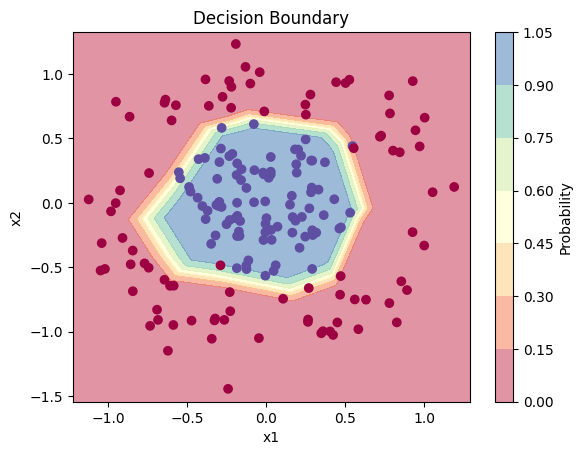

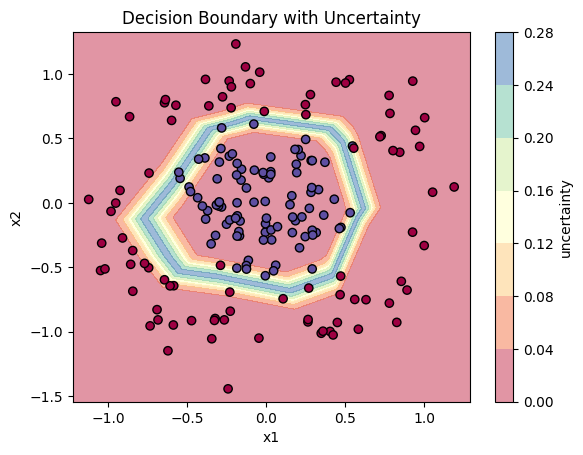

In [ ]:

model = Network(layers =
    [
        Linear(2, 10, name="input"),
        Activation(ReLU(), name="relu1"),
        Linear(10, 10, name="middle"),
        Activation(ReLU(), name="relu2"),
        Linear(10, 1, name="output"),
        Activation(Sigmoid(), name="sigmoid")
    ]
)


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

EPOCHS = 1000

model = Network(layers =
    [
        Linear(2, 10, name="input"),
        Activation(ReLU(), name="relu1"),
        Linear(10, 10, name="middle"),
        Activation(ReLU(), name="relu2"),
        Linear(10, 1, name="output"),
        Activation(Sigmoid(), name="sigmoid")
    ]
)

print(model)

def load_data():
    X, Y = make_circles(noise=0.15, factor=0.3, random_state=1, n_samples=500)
    Y = Y.reshape(-1, 1)
    Y = Y.reshape((Y.shape[0], 1))
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.36, random_state=42)
    return X_train, X_test, y_train, y_test


criterion = BinaryCrossEntropyLoss()
X_train, X_test, y_train, y_test = load_data()
for epoch in range(1, EPOCHS + 1):
    out = model(X_train)
    loss_gradient = criterion.gradient(y_train, out)
    model.backward(loss_gradient)
    model.update(lr=0.001)
    if epoch % 10 == 0:
        loss = criterion.loss(y_train, out)
        acc = (np.where(out > 0.5, 1, 0) == y_train).mean()
        print(f"Epoch: {epoch}, Loss:{loss}, Acc: {acc}")

In [ ]:
def plot_decision_boundary_and_uncertainty(model, X, Y):
    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # Predict the function value for the whole gid
    Z = model.forward(np.c_[x1.ravel(), x2.ravel()])
    Z = Z.reshape(x1.shape)
    # Plot the contour and training examples
    plt.contourf(x1, x2, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.colorbar(label='Probability')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()

    uncertainty = Z * (1 - Z)
    uncertainty = uncertainty.reshape(x1.shape)
    # Plot the contour and training examples
    plt.contourf(x1, x2, uncertainty, alpha=0.5, cmap=plt.cm.Spectral)
    plt.colorbar(label='uncertainty')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral, edgecolors='k')

    plt.title("Decision Boundary with Uncertainty")
    plt.show()

plot_decision_boundary_and_uncertainty(model, X_test, y_test)

### Problem 5 (5 points)

Run the provided code to visualize the output of the last layer, gradients, and weights.
Observe and analyze the visualizations.

You should see the decision boundary for each feature in the last layer.
The gradients and weights also provide insights into the learning process of the network.

In [ ]:
def plot_decision_boundary_per_feature_last_layer(model, X, Y):
    # Set min and max values and give it some padding
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.01
    # Generate a grid of points with distance h between them
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    # Predict the function value for the whole gid
    Z = model.forward(np.c_[x1.ravel(), x2.ravel()], last_layer=True)
    Z = Z.reshape([x1.shape[0], x1.shape[1], -1])
    last_layer_weight = model.layers[-2].W.reshape(-1)
    for feature_idx, feature_w in enumerate(last_layer_weight):
        feature = Z[:, :, feature_idx]
        plt.contourf(x1, x2, feature, alpha=0.5, cmap=plt.cm.Spectral)
        plt.colorbar(label='output value')
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral)
        plt.title("Decision Boundary of feature %d with weight: %.3f" % (feature_idx, feature_w))
        plt.show()

plot_decision_boundary_per_feature_last_layer(model, X_test, y_test)

In [ ]:
X, Y = X_test, y_test

# Set min and max values and give it some padding
x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
h = 0.01
# Generate a grid of points with distance h between them
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
# Predict the function value for the whole gid
Z = model.forward(np.c_[x1.ravel(), x2.ravel()], last_layer=True)
Z = Z.reshape([x1.shape[0], x1.shape[1], -1])
last_layer_weight = model.layers[-2].W.reshape(-1)
for feature_idx, feature_w in enumerate(last_layer_weight):
    feature = Z[:, :, feature_idx]
    plt.contourf(x1, x2, feature, alpha=0.5, cmap=plt.cm.Spectral)
    plt.colorbar(label='output value')
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=Y.reshape(-1), cmap=plt.cm.Spectral)
    plt.title("Decision Boundary of feature %d with weight: %.3f" % (feature_idx, feature_w))
    plt.show()

In [ ]:
import matplotlib.colors as mcolors


def visualize_layer(layer, visualize_gradient = True):
    if not hasattr(layer, "gradient_w"):
        return
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Assuming layer.grad_W and layer.grad_b exist

    if visualize_gradient:
        _W = layer.gradient_w
        _b = layer.gradient_b
        sns.heatmap(_W, ax=axs[0], center=0, cmap='coolwarm')
    else:
        _W = layer.W
        _b = layer.b
        colors = ['yellow', "red", "black", "orange", 'yellow']  # Red to White to Blue
        cm = mcolors.LinearSegmentedColormap.from_list("custom1", colors, N=100)
        sns.heatmap(_W, ax=axs[0], center=0, cmap=cm,  vmin=-1, vmax=1)
    print(_W.shape, _b.shape)
    # Visualize gradients of weights

    if visualize_gradient:
        axs[0].set_title('Gradient of Weights')
    else:
        axs[0].set_title('Weights')

    # Visualize gradients of biases
    # Note: grad_b is 2D (1 x output_dim), so we flatten it for easier visualization
    axs[1].plot(_b.flatten(), marker='o')
    if visualize_gradient:
        axs[1].set_title('Gradient of Biases')
    else:
        axs[1].set_title('Biases')
    axs[1].set_xlabel('Bias Index')
    axs[1].set_ylabel('Value')

    plt.show()

In [ ]:
for layer in model.layers:
    visualize_layer(layer)

In [ ]:
for layer in model.layers:
    visualize_layer(layer, visualize_gradient=False)

**[TODO: Write your answer here]**

### Problem 6 (10 points)

Modify the network architecture to remove all intermediate ReLU activations.
Retrain this network without the ReLU activations and visualize the decision boundary and uncertainty of the retrained network.
Observe how the lack of ReLU activations affects the network's ability to learn non-linear patterns.

**[TODO: Write your answer here]**

### Problem 7 (10 points)

Answer the following questions:
  - If handling multi-class classification, which final-layer activation should we use? What is the probability for each class?
  - Derive the maximum likelihood estimation for that layer. What is the derived loss function? (over a dataset $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^N$, where each $y_i$ is a class number between $[1,K]$, suppose there are totally $K$ class)

**[TODO: Write your answer here]**

## Part 2: Evaluation and Regularization

### Problem 8 (15 points)
Implement the precision-recall curve and the ROC-AUC curve for binary classification.
Compare the plots obtained using the model with and without ReLU activations.
You can use your implementation from Problem 6.

- Compute the predicted probabilities for the positive class on the test set.
- The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives.
- The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. 
- Compute the True Positive Rate (TPR) and False Positive Rate (FPR) for various threshold values.
- Plot the ROC curve (FPR vs TPR) and compute the Area Under the Curve (AUC).

You can compare your implementation with `sklearn.metrics.precision_recall_curve`, `sklearn.metrics.roc_curve`, and `sklearn.metrics.auc` to verify the computation of the ROC curve and AUC values.

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

y_score = model(X_test)
y_score_lin = model_lin(X_test)  # Suppose your model from Problem 6 is named `model_lin`

# You can compare your implementation with sklearn.metrics.precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
precision_lin, recall_lin, _ = precision_recall_curve(y_test, y_score_lin) 
plt.figure()
plt.plot(recall, precision, label='Neural Networks')
plt.plot(recall_lin, precision_lin, label='Linear Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Sklearn Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:


# TODO: Implement the precision-recall curve for binary classification
def my_precision_recall_curve(y_test, y_score):
    """Compute precision-recall pairs for different probability thresholds.

    Note: this implementation is restricted to the binary classification task.

    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.

    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.

    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold. This ensures that the graph starts on the
    y axis.

    The first precision and recall values are precision=class balance and recall=1.0
    which corresponds to a classifier that always predicts the positive class.

    Parameters
    ----------
    y_test : array-like of shape (n_samples,)
        True binary labels. 

    y_score : array-like of shape (n_samples,)
        Target scores as probability estimates of the positive class.


    Returns
    -------
    precision : ndarray of shape (n_thresholds + 1,)
        Precision values such that element i is the precision of
        predictions with score >= thresholds[i] and the last element is 1.

    recall : ndarray of shape (n_thresholds + 1,)
        Decreasing recall values such that element i is the recall of
        predictions with score >= thresholds[i] and the last element is 0.

    thresholds : ndarray of shape (n_thresholds,)
        Increasing thresholds on the decision function used to compute
        precision and recall where `n_thresholds = len(np.unique(y_score))`.
    """
    # START YOUR CODE HERE
    pass 
    # END YOUR CODE HERE


# You can compare your implementation with sklearn.metrics.precision_recall_curve
precision, recall, _ = my_precision_recall_curve(y_test, y_score)
precision_lin, recall_lin, _ = my_precision_recall_curve(y_test, y_score_lin) 
plt.figure()
plt.plot(recall, precision, label='Neural Networks')
plt.plot(recall_lin, precision_lin, label='Linear Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('My Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# You can compare your implementation with sklearn.metrics.roc_curve 
# and sklearn.metrics.auc to verify the computation of the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_score_lin)
roc_auc_lin = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_lin, tpr_lin, color='blue', lw=2, label='ROC curve Linear Model (area = %0.2f)' % roc_auc_lin)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sklearn Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# TODO: Implement the ROC-AUC curve for binary classification
def my_roc_curve(y_test, y_score):
    """Compute Receiver operating characteristic (ROC).

    Note: this implementation is restricted to the binary classification task.

    Parameters
    ----------
    y_test : array-like of shape (n_samples,)
        True binary labels. 

    y_score : array-like of shape (n_samples,)
        Target scores as probability estimates of the positive class.

    Returns
    -------
    fpr : ndarray of shape (>2,)
        Increasing false positive rates such that element i is the false
        positive rate of predictions with score >= `thresholds[i]`.

    tpr : ndarray of shape (>2,)
        Increasing true positive rates such that element `i` is the true
        positive rate of predictions with score >= `thresholds[i]`.

    thresholds : ndarray of shape (n_thresholds,)
        Decreasing thresholds on the decision function used to compute
        fpr and tpr. 
    """
    # START YOUR CODE HERE
        pass
    # END YOUR CODE HERE

In [ ]:
# You can compare your implementation with sklearn.metrics.roc_curve 
# and sklearn.metrics.auc to verify the computation of the ROC curve and AUC
fpr, tpr, _ = my_roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
fpr_lin, tpr_lin, _ = my_roc_curve(y_test, y_score_lin)
roc_auc_lin = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_lin, tpr_lin, color='blue', lw=2, label='ROC curve Linear Model (area = %0.2f)' % roc_auc_lin)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('My Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Problem 9 (10 points)

Implement weight decay (L2 regularization) in the `Linear_L2` layer.

Train the network with different weight decay values and visualize the learned weights for each model using `plot_decision_boundary_per_feature_last_layer`.
Observe how weight decay affects the magnitude and distribution of the learned weights.

In [ ]:
class Linear_L2(Linear):
    """
    Linear Layer with L2 regularization.
    """
    def update(self, lr=0.01, weight_decay=0.01):
        if self.gradient_w is not None:
            # TODO: Apply L2 regularization to update on weights only (not biases)
            # START YOUR CODE HERE
            pass
            # END YOUR CODE HERE
        if self.gradient_b is not None:
            self.b -= lr * self.gradient_b

In [ ]:
weights_per_model = []
for weight_decay in [0.1, 0.5, 1, 10]:
    model = Network(layers =
        [
            Linear_L2(2, 10, name="input"),
            Activation(ReLU(), name="relu1"),
            Linear_L2(10, 10, name="middle"),
            Activation(ReLU(), name="relu2"),
            Linear_L2(10, 1, name="output"),
            Activation(Sigmoid(), name="sigmoid")
        ]
    )

    criterion = BinaryCrossEntropyLoss()
    X_train, X_test, y_train, y_test = load_data()
    for epoch in range(1, EPOCHS + 1):
        out = model(X_train)
        loss_gradient = criterion.gradient(y_train, out)
        model.backward(loss_gradient)
        model.update(lr=0.001, weight_decay=weight_decay)
        if epoch % 100 == 0:
            loss = criterion.loss(y_train, out)
            acc = (np.where(out > 0.5, 1, 0) == y_train).mean()
            print(f"Epoch: {epoch}, Loss:{loss}, Acc: {acc}")
    plot_decision_boundary_per_feature_last_layer(model, X_test, y_test)
    
    for layer in model.layers:
        visualize_layer(layer, visualize_gradient=False)
    weights_per_model += [np.concatenate([layer.W.reshape(-1) for layer in model.layers if hasattr(layer, 'W')])]

In [ ]:
for ws, weight_decay in zip(weights_per_model, [0.1, 0.5, 1, 10]):
    sns.histplot(ws, label='Weight Decay=%f' % weight_decay, bins=100)
    plt.legend()
    plt.show()

**[TODO: Write your answer here]**

### Problem 10 (10 points)

Implement sparse decay (L1 regularization) in the `Linear_L1` layer.

Train the network with different sparse decay values and visualize the learned weights for each model using `plot_decision_boundary_per_feature_last_layer`.
Observe how sparse decay promotes sparsity in the learned weights.

In [ ]:
class Linear_L1(Linear):
    """
    Linear Layer with L1 regularization.
    """
    def update(self, lr=0.01, weight_decay=0.01):
        if self.gradient_w is not None:
            # TODO: Apply L1 regularization to update on weights only (not biases)
            # START YOUR CODE HERE
            pass
            # END YOUR CODE HERE
        if self.gradient_b is not None:
            self.b -= lr * self.gradient_b

In [ ]:
weights_per_model = []
for weight_decay in [0.1, 0.5, 1, 10]:
    model = Network(layers =
        [
            Linear_L1(2, 10, name="input"),
            Activation(ReLU(), name="rely1"),
            Linear_L1(10, 10, name="middle"),
            Activation(ReLU(), name="relu2"),
            Linear_L1(10, 1, name="output"),
            Activation(Sigmoid(), name="sigmoid")
        ]
    )

    criterion = BinaryCrossEntropyLoss()
    X_train, X_test, y_train, y_test = load_data()
    for epoch in range(1, EPOCHS + 1):
        out = model(X_train)
        loss_gradient = criterion.gradient(y_train, out)
        model.backward(loss_gradient)
        model.update(lr=0.001, weight_decay=weight_decay)
        if epoch % 100 == 0:
            loss = criterion.loss(y_train, out)
            acc = (np.where(out > 0.5, 1, 0) == y_train).mean()
            print(f"Epoch: {epoch}, Loss:{loss}, Acc: {acc}")
    plot_decision_boundary_per_feature_last_layer(model, X_test, y_test)
    for layer in model.layers:
        visualize_layer(layer, visualize_gradient=False)
    weights_per_model += [np.concatenate([layer.W.reshape(-1) for layer in model.layers if hasattr(layer, 'W')])]

In [ ]:
for ws, weight_decay in zip(weights_per_model, [0.1, 0.5, 1, 10]):
    sns.histplot(ws, label='Weight Decay=%f' % weight_decay, bins=100)
    plt.legend()
    plt.show()

**[TODO: Write your answer here]**